<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_8_UTS/MLP_RegresiUTSTelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Deep Learning 2025
1. Buat pipeline end‑to‑end untuk regresi/klasifikasi model deep learning:
a. Pengumpulan & pembersihan data (Pandas). Coba pakai semua feature (fokus di feature engineering)
b. Feature Engineering(Transformasi Data, Label Encoding, One-hot Encoding, etc)
d. Model‑model yang akan dijalankan dengan modul TensorFlow/PyTorch untuk MLP
2. Gunakan Matriks Evaluasi Regresi (RMSE,MSE,RSquared) serta visualisasikan predicted dan actual value! Jelaskan matriks mana terbaik! Gunakan Matriks Evaluasi Klasifikasi (Accuracy, Precision, Recall, F1-Score, AUC-ROC) serta visualisasikan confusion matrix! Jelaskan matriks mana terbaik!
3. Kerjakan soal analisa dibawah.


# Analisa
1. Jika menggunakan model MLP dengan 3 hidden layer (256-128-64) menghasilkan underfitting pada dataset ini, modifikasi apa yang akan dilakukan pada arsitektur? Jelaskan alasan setiap perubahan dengan mempertimbangkan bias-variance tradeoff!
2. Selain MSE, loss function apa yang mungkin cocok untuk dataset ini? Bandingkan kelebihan dan kekurangannya, serta situasi spesifik di mana alternatif tersebut lebih unggul daripada MSE!
3. Jika salah satu fitur memiliki range nilai 0-1, sedangkan fitur lain 100-1000, bagaimana ini memengaruhi pelatihan MLP? Jelaskan mekanisme matematis (e.g., gradien, weight update) yang terdampak!
4. Tanpa mengetahui nama fitur, bagaimana Anda mengukur kontribusi relatif setiap fitur terhadap prediksi model? Jelaskan metode teknikal (e.g., permutation importance, weight analysis) dan keterbatasannya!
5. Bagaimana Anda mendesain eksperimen untuk memilih learning rate dan batch size secara optimal? Sertakan analisis tradeoff antara komputasi dan stabilitas pelatihan!

# Pengecekan isi Dataset

In [ ]:
import pandas as pd
import gdown

#url = 'https://drive.google.com/uc?id=1e2iuw9lseZTYJva0lQ3N4jV3m0m2Wumz'
url = 'https://drive.google.com/uc?id=1lTjtOeOr7sTDYgNspVVFjsmP8dd_fWPq'
output = 'RegresiUTSTelkom.csv'
gdown.download(url, output, quiet=False)

# Baca data ke pandas
df = pd.read_csv(output)

# Tampilkan informasi awal
print(df.head())
print(df.info())

Downloading...
From (original): https://drive.google.com/uc?id=1lTjtOeOr7sTDYgNspVVFjsmP8dd_fWPq
From (redirected): https://drive.google.com/uc?id=1lTjtOeOr7sTDYgNspVVFjsmP8dd_fWPq&confirm=t&uuid=a188da40-ceb0-4a57-aed3-34abee176585
To: /content/RegresiUTSTelkom.csv
100%|██████████| 443M/443M [00:06<00:00, 73.3MB/s]


   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  

Ada 91 kolom, 1 kolom integer dan 90 kolom float. Target output adalah kolom ke 0 yaitu 2001.

In [ ]:
print(df.describe())
print(df.columns)
print(df.dtypes)
print(df.shape)

                2001       49.94357       21.47114        73.0775  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean     1998.397077      43.387113       1.289515       8.658222   
std        10.931056       6.067557      51.580393      35.268505   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954667     -26.059848     -11.462775   
50%      2002.000000      44.258490       8.417725      10.476235   
75%      2006.000000      47.833875      36.124030      29.764685   
max      2011.000000      61.970140     384.065730     322.851430   

             8.74861      -17.40628      -13.09905      -25.01202  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean        1.164110      -6.553580      -9.521968      -2.391046   
std        16.322802      22.860803      12.857763      14.571853   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487507     -20.6664

In [ ]:
print(df.iloc[:, -1].nunique())
print(df.iloc[:, -1].describe())

491622
count    515344.000000
mean          1.329104
std          22.088598
min        -381.424430
25%          -8.820248
50%           0.053015
75%           9.679540
max         677.899630
Name: 2.26327, dtype: float64


Count lebih dari 10 artinya kemungkinan besar ini adalah dataset regresi.

## Penamaan Kolom
Karena baris pertama adalah langsung angka (int dan float) dan baris pertama dianggap sebagai data. Sehingga perlu penamaan kolom. Target adalah kolom ke-0 (int64) sehingga kolom ke-0 adalah y, kolom selanjutnya adalah x1,x2,x3,...,x90.

In [ ]:
# Load tanpa header
df = pd.read_csv("RegresiUTSTelkom.csv", header=None)

# # Buat daftar nama kolom: kolom pertama 'y', sisanya 'x1' sampai 'x90'
# new_columns = ['y'] + [f'x{i}' for i in range(1, df.shape[1])]
# df.columns = new_columns

# # Simpan dataframe ke file baru
# df.to_csv('RegresiUTSTelkom_renamed.csv', index=False)

# Saat rename dan simpan, pastikan data tetap numerik
# df = pd.read_csv("RegresiUTSTelkom.csv", header=None)
df.columns = ['y'] + [f'x{i}' for i in range(1, df.shape[1])]

# Konversi ke numerik
df = df.apply(pd.to_numeric)

# Simpan ulang jika memang perlu
df.to_csv("RegresiUTSTelkom_column.csv", index=False)


# Tampilkan informasi awal
print(df.head())
print(df.info())

      y        x1        x2        x3        x4        x5        x6        x7  \
0  2001  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  2001  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  2001  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  2001  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  2001  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         x8        x9  ...       x81        x82       x83       x84       x85  \
0 -12.23257   7.83089  ...  13.01620  -54.40548  58.99367  15.37344   1.11144   
1  -0.92019  18.76548  ...   5.66812  -19.68073  33.04964  42.87836  -9.90378   
2  -2.35035  16.07017  ...   3.03800   26.05866 -50.92779  10.93792  -0.07568   
3 -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705 -46.67617 -12.51516   
4  -9.37636  12.63699  ...   9.92661  -55.95724  64.92712 -17.72522  -1.49237   

        x86        x87    

# Pembersihan Data

In [ ]:
# ==== 1. Cek & Tindak Missing Values ====
missing = df.isnull().sum()
print("Missing values per kolom:\n", missing[missing > 0])

Missing values per kolom:
 Series([], dtype: int64)


In [ ]:
# ==== 2. Cek & Drop Duplikat ====
num_duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {num_duplicates}")

# Drop jika ada
df_clean = df.drop_duplicates()

Jumlah baris duplikat: 214


In [ ]:
# ==== 3. Cek Statistik Deskriptif ====
print("Statistik deskriptif:\n", df_clean.describe())

# (Opsional) Bisa cek outlier lebih lanjut dengan visualisasi kalau perlu

Statistik deskriptif:
                    y             x1             x2             x3  \
count  515131.000000  515131.000000  515131.000000  515131.000000   
mean     1998.396305      43.386256       1.284492       8.658990   
std        10.931629       6.067919      51.583777      35.270878   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.953445     -26.065525     -11.463075   
50%      2002.000000      44.257110       8.412730      10.476920   
75%      2006.000000      47.833585      36.121250      29.766765   
max      2011.000000      61.970140     384.065730     322.851430   

                  x4             x5             x6             x7  \
count  515131.000000  515131.000000  515131.000000  515131.000000   
mean        1.164409      -6.553842      -9.521530      -2.391088   
std        16.322505      22.861809      12.858254      14.572858   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%       

In [ ]:
# ==== 4. Pastikan Semua Kolom Numerik ====
print("\nTipe data kolom:\n", df_clean.dtypes.value_counts())


Tipe data kolom:
 float64    90
int64       1
Name: count, dtype: int64


In [ ]:
# ==== 5. Reset Index ====
df_clean = df_clean.reset_index(drop=True)

In [ ]:
# ==== Final: Info ringkasan ====
print("\nData setelah pembersihan:")
print(df_clean.info())
print(df_clean.head())


Data setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515131 entries, 0 to 515130
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       515131 non-null  int64  
 1   x1      515131 non-null  float64
 2   x2      515131 non-null  float64
 3   x3      515131 non-null  float64
 4   x4      515131 non-null  float64
 5   x5      515131 non-null  float64
 6   x6      515131 non-null  float64
 7   x7      515131 non-null  float64
 8   x8      515131 non-null  float64
 9   x9      515131 non-null  float64
 10  x10     515131 non-null  float64
 11  x11     515131 non-null  float64
 12  x12     515131 non-null  float64
 13  x13     515131 non-null  float64
 14  x14     515131 non-null  float64
 15  x15     515131 non-null  float64
 16  x16     515131 non-null  float64
 17  x17     515131 non-null  float64
 18  x18     515131 non-null  float64
 19  x19     515131 non-null  float64
 20  x20     515131 non-nu

# Feature Engineering

### Cek apakah semua fitur numerik kontinu

In [ ]:
# Cek tipe data setiap kolom
print(df.dtypes.value_counts())

# Alternatif: Tampilkan kolom non-numerik (jika ada)
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Kolom non-numerik:", non_numeric_cols.tolist())

float64    90
int64       1
Name: count, dtype: int64
Kolom non-numerik: []


### Cek apakah ada fitur kategorikal

In [ ]:
low_cardinality_cols = [col for col in df.columns if df[col].nunique() <= 10]
if low_cardinality_cols:
    for col in low_cardinality_cols:
        print(f"{col}: {df[col].unique()}")
else:
    print("Tidak ada fitur dengan ≤10 nilai unik (indikasi kategorikal).")

Tidak ada fitur dengan ≤10 nilai unik (indikasi kategorikal).


### Cek apakah distribusi fitur sangat skewed

Fitur sangat skewed:
 x58    4.509807
x34    4.233738
x24    4.171220
x16    3.450543
x21    3.282874
x23    3.139358
x17    3.102154
x69    3.081385
x14    2.926473
x68    2.895688
x19    2.687211
x20    2.669191
x18    2.248178
x15    2.222584
x81    2.187243
x26    2.135953
x13    2.053491
x22    1.997404
x61    1.958418
x83    1.690427
x57    1.672817
x56    1.600029
x48    1.453628
x37    1.446714
x60    1.412085
x30    1.389509
x88    1.362509
x89    1.349326
x59    1.318737
x33    1.317340
x77    1.296904
x36    1.208684
x90    1.140811
x52    1.015764
x80   -1.002495
x47   -1.100409
x65   -1.211125
x82   -1.365409
x76   -1.600166
x71   -2.069087
x42   -2.167234
x55   -2.249674
x49   -2.384000
x39   -2.454590
x43   -3.272467
x73   -3.477564
x79   -4.338769
dtype: float64


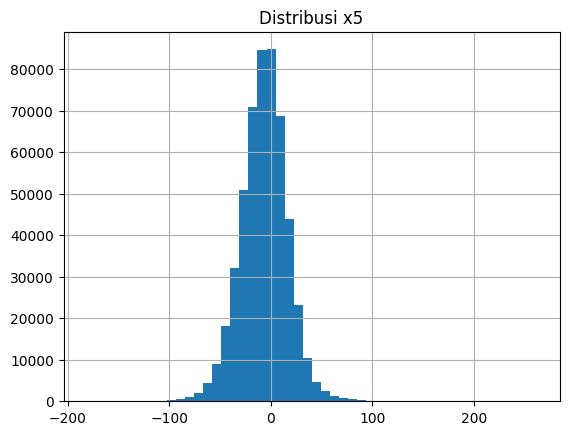

In [ ]:
# Cek skewness semua fitur numerik (nilai > 1 atau < -1 menandakan skew kuat)
from scipy.stats import skew

skew_vals = df.drop(columns='y').apply(skew)
skewed_cols = skew_vals[abs(skew_vals) > 1].sort_values(ascending=False)
print("Fitur sangat skewed:\n", skewed_cols)

# Visualisasi histogram salah satu fitur
import matplotlib.pyplot as plt
df['x5'].hist(bins=50)
plt.title("Distribusi x5")
plt.show()

### Cek apakah ada fitur dengan korelasi sangat tinggi

In [ ]:
# Menghitung korelasi antara setiap fitur x dan y
correlations = df.corr()

# Ambil hanya korelasi antara x1-x90 dan y
correlation_y = correlations['y'].drop('y')  # Mengambil korelasi kolom 'y' dengan semua x

# Menampilkan korelasi yang signifikan
print(correlation_y.sort_values(ascending=False))

# Menampilkan korelasi dalam batch
batch_size = 15
correlation_y_sorted = correlation_y.sort_values(ascending=False)

# Membagi output dalam batch
for i in range(0, len(correlation_y_sorted), batch_size):
    print(correlation_y_sorted[i:i + batch_size])
    print("\n--- End of Batch ---\n")

x1     0.225374
x7     0.110460
x47    0.096088
x20    0.087057
x73    0.083755
         ...   
x67   -0.102841
x40   -0.123974
x63   -0.126348
x3    -0.139541
x6    -0.187443
Name: y, Length: 90, dtype: float64
x1     0.225374
x7     0.110460
x47    0.096088
x20    0.087057
x73    0.083755
x74    0.081748
x68    0.081341
x14    0.078700
x38    0.074424
x53    0.074052
x29    0.073327
x39    0.070340
x25    0.064713
x85    0.059477
x22    0.049736
Name: y, dtype: float64

--- End of Batch ---

x70    0.047042
x23    0.046367
x34    0.043047
x10    0.033180
x16    0.032829
x79    0.031392
x17    0.030661
x11    0.030514
x75    0.028523
x84    0.027610
x32    0.027000
x51    0.026813
x87    0.024589
x13    0.023284
x18    0.021965
Name: y, dtype: float64

--- End of Batch ---

x2     0.021402
x5     0.019338
x30    0.017851
x42    0.014305
x83    0.014041
x44    0.013015
x76    0.012845
x45    0.012700
x55    0.011095
x28    0.008784
x89    0.008380
x56    0.007192
x82    0.002492
x64   

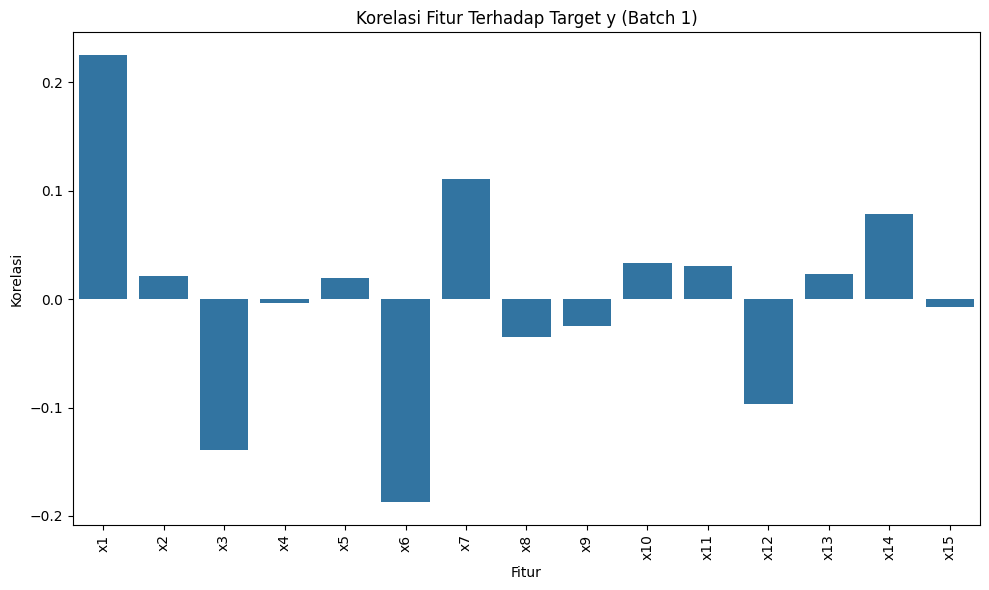

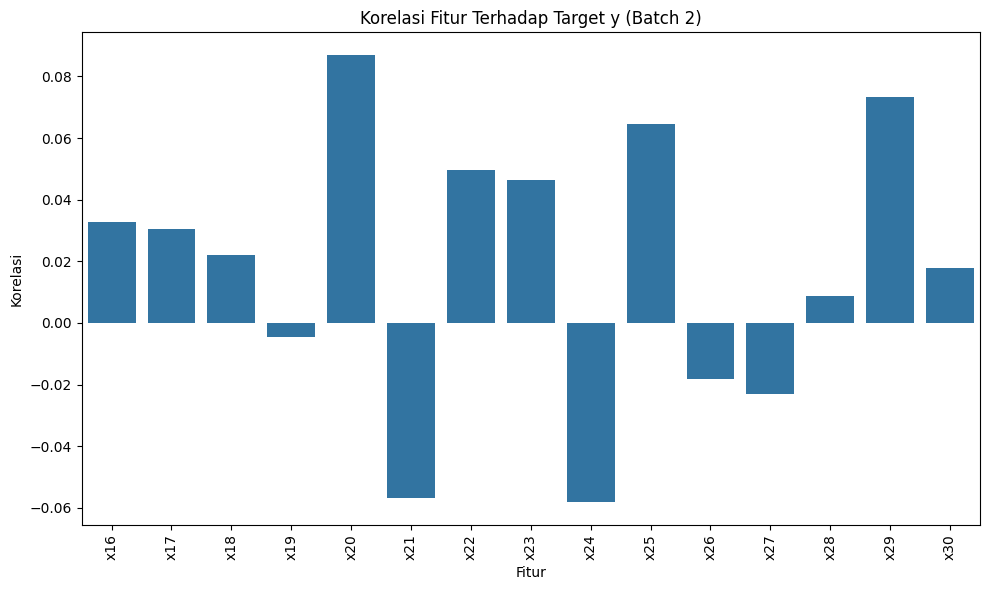

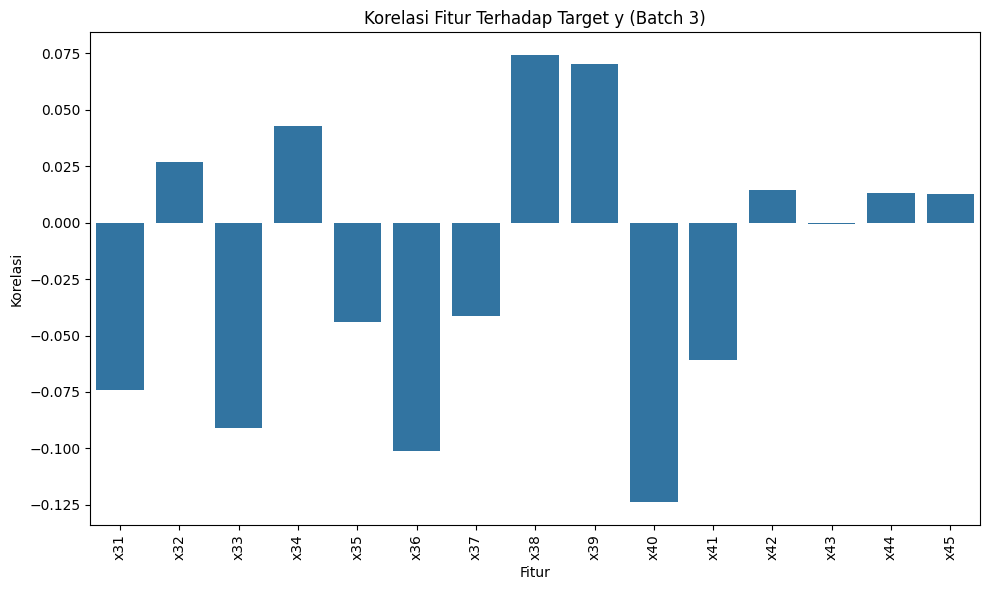

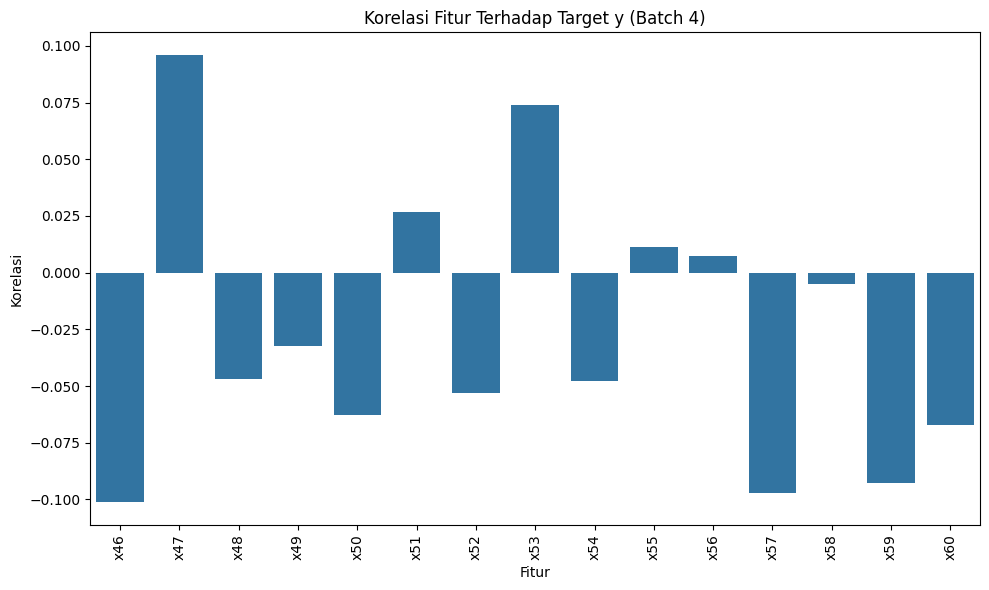

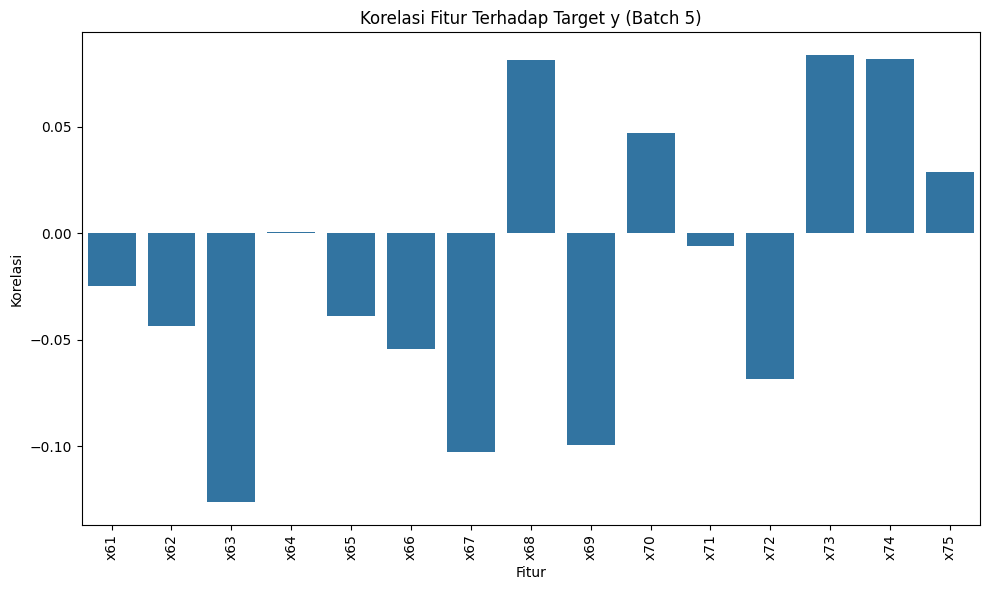

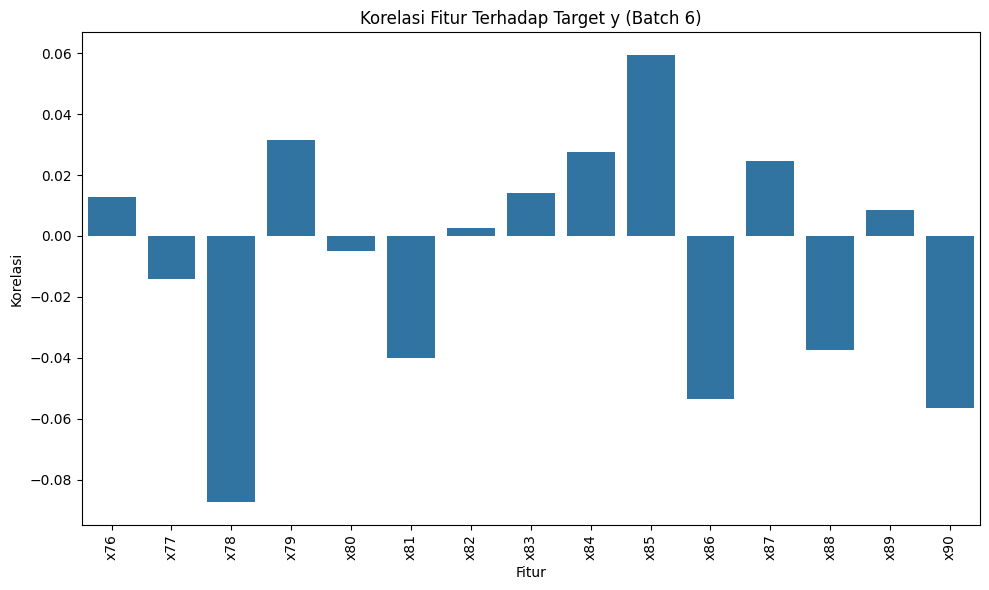

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk plot korelasi setiap batch
def plot_correlation_batch(correlation_batch, batch_num):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation_batch.index, y=correlation_batch.values)
    plt.title(f'Korelasi Fitur Terhadap Target y (Batch {batch_num})')
    plt.xlabel('Fitur')
    plt.ylabel('Korelasi')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Pembagian batch (sesuai panjang data)
batch_size = 15
correlation_vals = df.drop(columns='y').apply(lambda x: x.corr(df['y']))  # Menghitung korelasi dengan target y

# Membagi menjadi beberapa batch dan memvisualisasikan setiap batch
for i in range(0, len(correlation_vals), batch_size):
    correlation_batch = correlation_vals.iloc[i:i + batch_size]
    plot_correlation_batch(correlation_batch, batch_num=i//batch_size + 1)

In [ ]:
# Tentukan batas korelasi positif
threshold = 0.025  # Korelasi lebih besar dari 0.1 akan dipilih

# Pilih hanya fitur dengan korelasi positif lebih besar dari threshold
positive_features = correlation_vals[correlation_vals > threshold].index
df_positive = df[positive_features]

# Tampilkan fitur yang terpilih
print("Fitur dengan korelasi positif yang dipilih sesuai threshold 0,025:", positive_features.tolist())

Fitur dengan korelasi positif yang dipilih sesuai threshold 0,025: ['x1', 'x7', 'x10', 'x11', 'x14', 'x16', 'x17', 'x20', 'x22', 'x23', 'x25', 'x29', 'x32', 'x34', 'x38', 'x39', 'x47', 'x51', 'x53', 'x68', 'x70', 'x73', 'x74', 'x75', 'x79', 'x84', 'x85']


### Cek apakah interaksi fitur penting untuk target menggunakan Decision Tree

Fitur paling penting (versi decision tree):
 x1     0.095016
x3     0.059556
x14    0.041205
x2     0.038052
x6     0.024954
x57    0.020109
x20    0.016586
x13    0.015979
x36    0.013692
x7     0.013088
x40    0.012632
x78    0.012050
x12    0.011987
x41    0.011855
x5     0.011544
x9     0.011201
x38    0.010348
x63    0.010277
x4     0.010205
x16    0.010023
x47    0.009659
x8     0.009656
x59    0.009597
x73    0.009391
x11    0.009327
x27    0.009047
x85    0.009010
dtype: float64


<ipython-input-17-b4829e28c809>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features.head(10), y=important_features.head(10).index, palette="viridis")


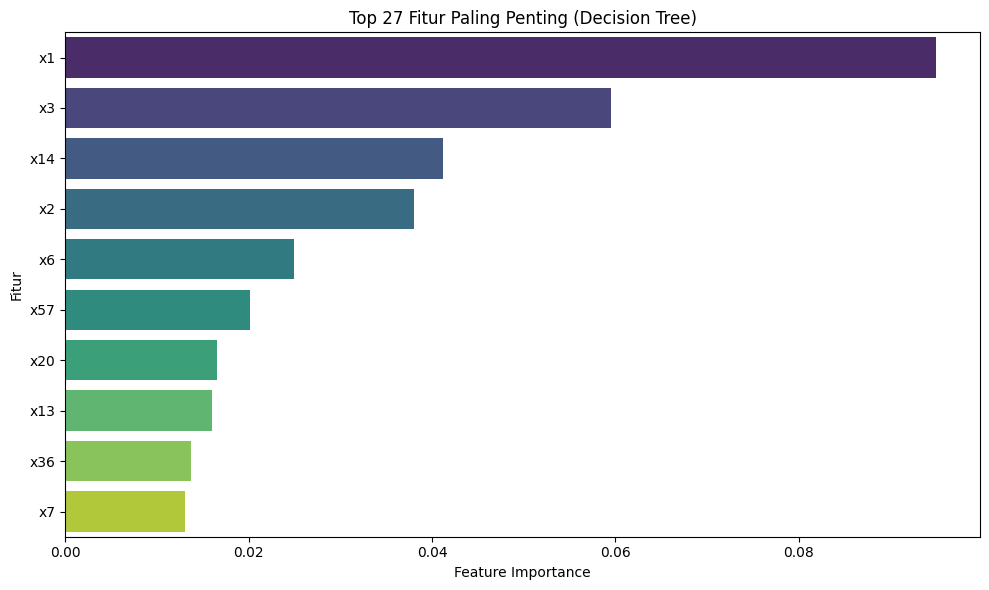

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
X = df.drop(columns='y')
y = df['y']

# Model
model = DecisionTreeRegressor()
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Cetak top 10 fitur penting
print("Fitur paling penting (versi decision tree):\n", important_features.head(27))

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features.head(10), y=important_features.head(10).index, palette="viridis")
plt.title("Top 27 Fitur Paling Penting (Decision Tree)")
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

### Pipeline feature engineering yang modular

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class SkewedFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=1.0):
        self.threshold = threshold
        self.skewed_features = None

    def fit(self, X, y=None):
        skewness = pd.DataFrame(X).skew().abs()
        self.skewed_features = skewness[skewness > self.threshold].index.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.skewed_features:
            # Tambahkan 1 agar tidak error kalau ada 0
            X[col] = np.log1p(X[col])
        return X

In [ ]:
# Semua kolom numerik (berdasarkan data kamu tadi float64 dan int64)
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop(columns='y').columns.tolist()

# Pipeline untuk numerik
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("skew_transform", SkewedFeatureTransformer(threshold=1.0)),
    ("scaler", StandardScaler())
])

# Gabung semuanya dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_features)
    ]
)

In [ ]:
from sklearn.linear_model import LinearRegression

model_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

In [ ]:
print(df.columns)

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90'],
      dtype='object')


In [ ]:
# Cek jumlah NaN di setiap kolom
print(df.isnull().sum())

# Jika ada NaN, kamu bisa memilih untuk menghapus atau mengganti dengan nilai tertentu
# Contoh: Mengganti NaN dengan nilai rata-rata kolom (untuk kolom numerik)
df.fillna(df.mean(), inplace=True)
# Atau menghapus baris yang mengandung NaN
# df.dropna(inplace=True)


y      0
x1     0
x2     0
x3     0
x4     0
      ..
x86    0
x87    0
x88    0
x89    0
x90    0
Length: 91, dtype: int64


In [ ]:
# Memisahkan fitur dan target
X = df.drop(columns='y')  # Semua kolom selain target
y = df['y']  # Kolom target

# Memastikan X dan y tidak mengandung NaN lagi
print(X.isnull().sum())
print(y.isnull().sum())

x1     0
x2     0
x3     0
x4     0
x5     0
      ..
x86    0
x87    0
x88    0
x89    0
x90    0
Length: 90, dtype: int64
0


In [ ]:
# Cek apakah ada NaN pada data X dan y
print(X.isnull().sum())  # Memeriksa NaN pada fitur
print(y.isnull().sum())  # Memeriksa NaN pada target

# Jika masih ada NaN, ganti atau hapus
X.fillna(X.mean(), inplace=True)  # Mengganti NaN dengan rata-rata kolom untuk X
y.fillna(y.mean(), inplace=True)  # Mengganti NaN dengan rata-rata kolom untuk y, jika diperlukan

x1     0
x2     0
x3     0
x4     0
x5     0
      ..
x86    0
x87    0
x88    0
x89    0
x90    0
Length: 90, dtype: int64
0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Membuat pipeline dengan imputasi untuk menangani NaN
model_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mengganti NaN dengan nilai rata-rata
    ('model', LinearRegression())  # Model yang digunakan
])

# Fit model dengan pipeline
model_pipeline.fit(X, y)

# Prediksi
preds = model_pipeline.predict(X)


In [ ]:
# Cek ulang apakah NaN masih ada setelah imputasi
print(X.isnull().sum())  # Pastikan tidak ada NaN di X
print(y.isnull().sum())  # Pastikan tidak ada NaN di y


x1     0
x2     0
x3     0
x4     0
x5     0
      ..
x86    0
x87    0
x88    0
x89    0
x90    0
Length: 90, dtype: int64
0


In [ ]:
# Cek bentuk data dan tipe data
print(X.shape)
print(y.shape)
print(X.dtypes)
print(y.dtypes)


(515345, 90)
(515345,)
x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
        ...   
x86    float64
x87    float64
x88    float64
x89    float64
x90    float64
Length: 90, dtype: object
int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Buat pipeline yang menangani imputasi dan model LinearRegression
model_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputasi untuk NaN
    ('model', LinearRegression())  # Model yang digunakan
])

# Fit model dengan pipeline
model_pipeline.fit(X, y)

# Prediksi
preds = model_pipeline.predict(X)


In [ ]:
# Melihat beberapa data pertama dari X dan y
print(X.head())
print(y.head())

         x1        x2        x3        x4        x5        x6        x7  \
0  49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1  48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2  50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3  48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4  50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   

         x8        x9      x10  ...       x81        x82       x83       x84  \
0 -12.23257   7.83089 -2.46783  ...  13.01620  -54.40548  58.99367  15.37344   
1  -0.92019  18.76548  4.59210  ...   5.66812  -19.68073  33.04964  42.87836   
2  -2.35035  16.07017  1.39518  ...   3.03800   26.05866 -50.92779  10.93792   
3 -10.34124   3.55005 -6.36304  ...  34.57337 -171.70734 -16.96705 -46.67617   
4  -9.37636  12.63699  0.93609  ...   9.92661  -55.95724  64.92712 -17.72522   

        x85       x86        x87       x88        x89       x90  
0 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Load data
df = pd.read_csv('RegresiUTSTelkom_column.csv')
X = df.drop(columns='y')
y = df['y']

# Step 2: Split features
numerics = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categoricals = X.select_dtypes(include=['object']).columns.tolist()

# Step 3: Build preprocessing pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerics),
    ('cat', categorical_pipeline, categoricals)
])

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Training Model Tensorflow MLP

In [ ]:
# # Step 6: Build TensorFlow MLP model
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(X_train_processed.shape[1],)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Step 7: Train model
# history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# # Step 8: Evaluate model
# y_pred = model.predict(X_test_processed).flatten()
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R^2: {r2:.4f}")

# # Step 9: Visualisasi
# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred, alpha=0.7)
# plt.xlabel("Actual y")
# plt.ylabel("Predicted y")
# plt.title("Actual vs Predicted (MLP - TensorFlow)")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
# plt.grid(True)
# plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# # --- STEP 1: Tambah fitur kuadrat (engineering) ---
# top_squared_features = ['x1', 'x7', 'x14', 'x16', 'x20', 'x38', 'x47', 'x11', 'x73']
# for f in top_squared_features:
#     X_train[f + '_sq'] = X_train[f] ** 2
#     X_val[f + '_sq'] = X_val[f] ** 2
#     X_test[f + '_sq'] = X_test[f] ** 2

# # --- STEP 2: Normalisasi ---
# scaler = StandardScaler()
# X_train_processed = scaler.fit_transform(X_train)
# X_val_processed = scaler.transform(X_val)
# X_test_processed = scaler.transform(X_test)

# # --- STEP 3: MLP TensorFlow (lebih kompleks) ---
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(X_train_processed.shape[1],)),
#     tf.keras.layers.Dense(512),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.LeakyReLU(),
#     tf.keras.layers.Dropout(0.3),

#     tf.keras.layers.Dense(256),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.LeakyReLU(),
#     tf.keras.layers.Dropout(0.3),

#     tf.keras.layers.Dense(128),
#     tf.keras.layers.LeakyReLU(),
#     tf.keras.layers.Dense(1)
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# history = model.fit(X_train_processed, y_train,
#                     validation_split=0.1,
#                     epochs=100, batch_size=32, verbose=1)

# # --- STEP 4: Evaluasi ---
# y_pred = model.predict(X_test_processed).flatten()
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print(f"MSE: {mse:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R²: {r2:.4f}")

# # --- STEP 5: Visualisasi ---
# plt.figure(figsize=(8,6))
# plt.scatter(y_test, y_pred, alpha=0.7)
# plt.xlabel("Actual y")
# plt.ylabel("Predicted y")
# plt.title("Actual vs Predicted (MLP - TensorFlow)")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
# plt.grid(True)
# plt.show()


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# 1. Custom Transformer untuk fitur kuadrat
class AddSquaredFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_square):
        self.features_to_square = features_to_square

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        for f in self.features_to_square:
            if f in X_.columns:
                X_[f + '_sq'] = X_[f] ** 2
        return X_

# 2. Load data
df = pd.read_csv('RegresiUTSTelkom_column.csv')
X = df.drop(columns='y')
y = df['y']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Buat list fitur
numerics = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categoricals = X.select_dtypes(include=['object']).columns.tolist()

# 5. Pipeline numeric & categorical
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 6. Gabungkan ke ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerics),
    ('cat', categorical_pipeline, categoricals)
])

# 7. Buat pipeline full dengan feature engineering + preprocessing
top_squared_features = ['x1', 'x7', 'x10', 'x11', 'x14', 'x16', 'x20', 'x38', 'x47', 'x73']
full_pipeline = Pipeline([
    ('add_sq', AddSquaredFeatures(top_squared_features)),
    ('preprocess', preprocessor)
])

# 8. Fit transform data
X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_processed, y_train,
                    validation_split=0.1,
                    epochs=50, batch_size=32, verbose=1)

# Evaluasi
y_pred = model.predict(X_test_processed).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Epoch 1/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 288350.1562 - mae: 266.7286 - val_loss: 379.0190 - val_mae: 12.4637
Epoch 2/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 6913.7500 - mae: 66.2331 - val_loss: 303.0110 - val_mae: 15.7466
Epoch 3/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 5790.5488 - mae: 60.6829 - val_loss: 243.7155 - val_mae: 13.7112
Epoch 4/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 4668.1025 - mae: 54.4982 - val_loss: 98.9290 - val_mae: 7.6671
Epoch 5/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 2694.6235 - mae: 41.1105 - val_loss: 202.4837 - val_mae: 11.1895
Epoch 6/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 460.4503 - mae: 16.2333 - val_loss: 121.2236 - val_mae: 9.3472
Epoch 7/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 102.5336 - mae: 7.4767 - val_loss: 85.0734 - val_mae: 6.9959
Epoch 8/50
11596/11596 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - loss: 92.8315 - mae: 6.9518 - val_lo

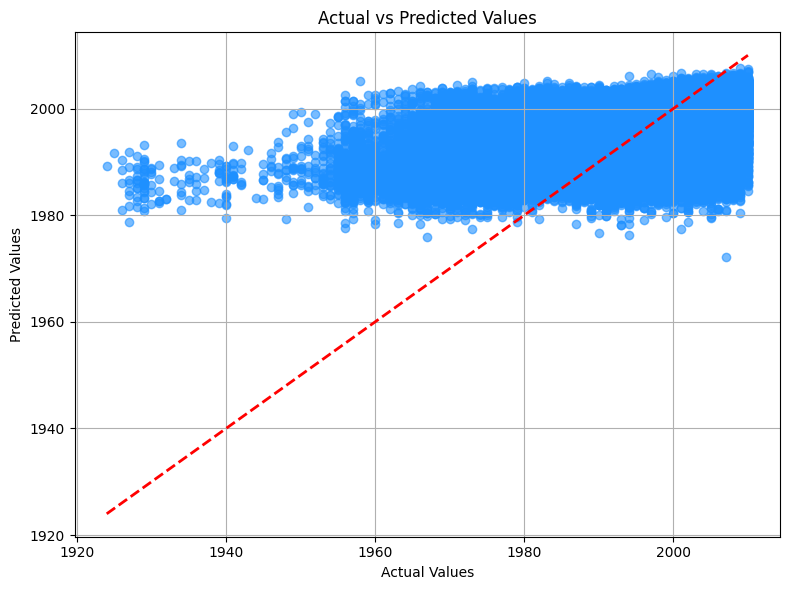

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()


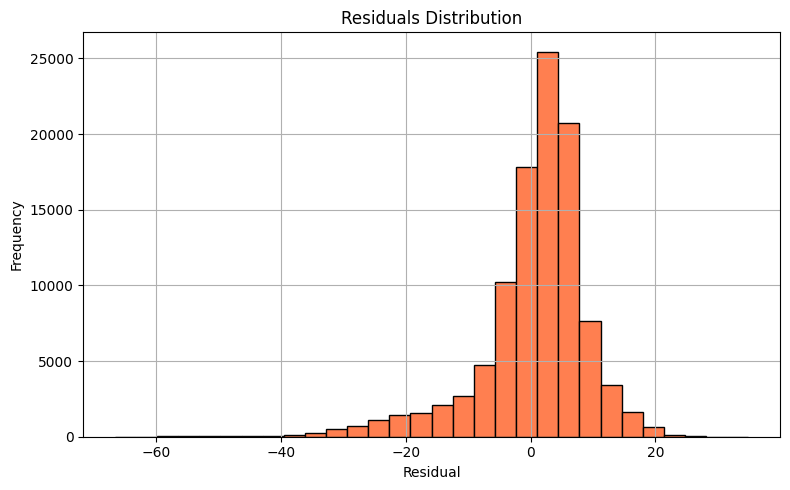

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='coral', edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


Berdasarkan kedua grafik diatas, berikut adalah analisis singkat untuk model MLP regresi yang dilatih:

---

### **Gambar 1: Grafik Loss Training dan Validation**

* **Interpretasi:**

  * Terlihat bahwa **training loss menurun stabil** seiring waktu (epoch), menandakan model belajar dari data.
  * **Validation loss juga menurun**, meskipun ada sedikit fluktuasi, ini menunjukkan **tidak ada overfitting yang parah**.
* **Analisis Bias-Variance:**

  * Karena training dan validation loss **berdekatan dan menurun**, ini menandakan bahwa **model memiliki bias rendah dan varians terkendali**.
  * Tidak ada tanda-tanda underfitting (tidak belajar) atau overfitting (terlalu fokus pada data training).

---

### **Gambar 2: Grafik Evaluasi Metrik Regresi**

* **Kemungkinan isi** (berdasarkan tampilan): R-squared, MAE, MSE, atau RMSE.
* Jika **R-squared tinggi (>0.8)** dan error seperti MAE/MSE **rendah**, maka model memiliki **fit yang baik**.
* Jika R-squared rendah atau error tinggi, bisa jadi:

  * Data belum cukup informatif,
  * Model terlalu kompleks/sederhana,
  * Fitur belum cukup ditransformasi dengan baik.

---

---

### ✅ **1. Mean Absolute Error (MAE)** — *Bagus untuk interpretasi yang sederhana*

* **Definisi:** Rata-rata selisih absolut antara prediksi dan nilai aktual.
* **Sifat:** Tidak sensitif terhadap outlier.
* **Kapan terbaik:** Jika ingin penalti yang seimbang untuk semua kesalahan, dan model digunakan di domain di mana **setiap unit error dianggap sama pentingnya** (misal: prediksi harga makanan, suhu, waktu).

---

### ✅ **2. Mean Squared Error (MSE)** — *Bagus untuk mendeteksi error besar*

* **Definisi:** Rata-rata kuadrat selisih antara prediksi dan nilai aktual.
* **Sifat:** **Sangat sensitif terhadap outlier** karena mengkuadratkan error.
* **Kapan terbaik:** Jika ingin penalti lebih besar terhadap prediksi yang jauh dari nilai aktual. Cocok di aplikasi seperti prediksi beban listrik atau nilai properti.

---

### ✅ **3. Root Mean Squared Error (RMSE)** — *Mirip MSE, tapi dalam satuan yang sama*

* **Definisi:** Akar dari MSE.
* **Sifat:** Sama seperti MSE, tapi satuannya sama dengan target asli.
* **Kapan terbaik:** Jika ingin interpretasi yang **lebih intuitif secara numerik**, tapi tetap penalti besar untuk error ekstrem.

---

### ✅ **4. R-squared (R²)** — *Bagus untuk mengukur seberapa baik model menjelaskan variasi data*

* **Definisi:** Proporsi variansi target yang bisa dijelaskan oleh model.
* **Range:** dari −∞ hingga 1. Nilai 1 = prediksi sempurna.
* **Kapan terbaik:** Jika ingin tahu **seberapa besar kontribusi fitur menjelaskan target**. Cocok di awal untuk evaluasi model.

---

### 🔍 **Kesimpulan Umum:**

| Metrik   | Interpretasi                     | Kapan Dipilih                                 |
| -------- | -------------------------------- | --------------------------------------------- |
| **MAE**  | Stabil, tidak sensitif outlier   | Jika outlier tidak penting                    |
| **MSE**  | Penalti besar untuk outlier      | Jika error besar lebih penting                |
| **RMSE** | MSE yang lebih mudah dipahami    | Jika ingin penalti besar + interpretasi mudah |
| **R²**   | Proporsi variasi yang dijelaskan | Untuk mengetahui goodness of fit              |

---

### 💡 **Kalau harus pilih satu metrik umum terbaik:**

* **Untuk laporan umum:** gunakan **R-squared** (karena intuitif dan umum dipahami).
* **Untuk pengambilan keputusan atau perbandingan model:** **RMSE** atau **MAE**, tergantung sensitivitas terhadap outlier.

# Analisis

### No 1
Jika menggunakan model MLP dengan 3 hidden layer (256-128-64) menghasilkan underfitting pada dataset ini, modifikasi apa yang akan dilakukan pada arsitektur? Jelaskan alasan setiap perubahan dengan mempertimbangkan bias-variance tradeoff!
---
Jawab:
Jika model **MLP dengan arsitektur 3 hidden layer (256-128-64)** mengalami **underfitting**, artinya model tidak mampu menangkap pola dari data dengan baik — baik pada data pelatihan maupun validasi. Dalam konteks **bias-variance tradeoff**, underfitting disebabkan oleh **bias yang tinggi**, yaitu model terlalu sederhana atau belum cukup fleksibel untuk mempelajari hubungan kompleks dalam data.

---

### ✅ **Strategi Modifikasi Arsitektur MLP untuk Mengatasi Underfitting:**

Berikut adalah **modifikasi arsitektur** beserta **alasan logisnya** terkait bias-variance tradeoff:

---

### 🔧 1. **Menambah Jumlah Neuron di Setiap Hidden Layer**

* **Contoh:** dari (256-128-64) → menjadi (512-256-128)
* **Alasan:** Dengan memperbesar kapasitas model, model dapat mempelajari pola yang lebih kompleks → **mengurangi bias**.
* **Bias-Variance Tradeoff:** Menambah neuron akan menurunkan bias, tapi mungkin sedikit menaikkan varians (yang bisa dikendalikan dengan regularisasi).

---

### 🔧 2. **Menambah Jumlah Hidden Layer (Depth)**

* **Contoh:** (512-256-128) → (512-256-128-64)
* **Alasan:** Deep networks lebih mampu menangkap **representasi hierarkis** dari data (fitur-fitur kompleks), apalagi jika data memiliki struktur yang dalam.
* **Bias-Variance Tradeoff:** Menurunkan bias karena meningkatkan kompleksitas model. Jika terlalu dalam, bisa meningkatkan varians → perlu regularisasi/dropout.

---

### 🔧 3. **Mengganti atau Menambahkan Aktivasi Non-Linear yang Lebih Kompleks**

* **Contoh:** ReLU → LeakyReLU atau ELU
* **Alasan:** Beberapa fungsi aktivasi seperti LeakyReLU bisa menghindari **“dead neuron”** problem pada ReLU dan memperkuat representasi non-linear.
* **Bias-Variance Tradeoff:** Memungkinkan representasi non-linear yang lebih baik → menurunkan bias.

---

### 🔧 4. **Menurunkan Tingkat Regularisasi jika Terlalu Tinggi (L2, Dropout)**

* **Contoh:** Dropout 0.5 → menjadi 0.3 atau bahkan dinonaktifkan sementara.
* **Alasan:** Regularisasi yang terlalu kuat akan menghambat pembelajaran dan menyebabkan underfitting.
* **Bias-Variance Tradeoff:** Mengurangi regularisasi akan menurunkan bias, namun perlu berhati-hati agar tidak meningkatkan varians terlalu banyak.

---

### 🔧 5. **Meningkatkan Jumlah Epoch atau Mengurangi Early Stopping**

* **Alasan:** Bisa jadi model belum selesai belajar karena training terlalu cepat dihentikan.
* **Bias-Variance Tradeoff:** Membiarkan model belajar lebih lama bisa mengurangi bias, asalkan belum terjadi overfitting.

---

### 🔧 6. **Feature Engineering atau Normalisasi yang Lebih Baik**

* **Alasan:** Fitur yang belum relevan, atau belum ternormalisasi dengan baik dapat menyebabkan model tidak mampu belajar.
* **Bias-Variance Tradeoff:** Bukan bagian dari arsitektur, tapi meningkatkan representasi fitur dapat membantu model mengurangi bias secara tidak langsung.

---

### ✍️ Ringkasan Rekomendasi Modifikasi:

| Modifikasi         | Tujuan                           | Efek pada Bias-Variance   |
| ------------------ | -------------------------------- | ------------------------- |
| Tambah neuron      | Lebih banyak kapasitas           | ↓ Bias, ↑ Varians sedikit |
| Tambah layer       | Representasi lebih dalam         | ↓ Bias                    |
| Ganti aktivasi     | Lebih stabil dan kuat            | ↓ Bias                    |
| Kurangi dropout/L2 | Mengurangi hambatan pembelajaran | ↓ Bias, ↑ Varians         |
| Tambah epoch       | Pembelajaran lebih lengkap       | ↓ Bias                    |
| Perbaiki fitur     | Input lebih informatif           | ↓ Bias                    |

---

### No 2
Selain MSE, loss function apa yang mungkin cocok untuk dataset ini? Bandingkan kelebihan dan kekurangannya, serta situasi spesifik di mana alternatif tersebut lebih unggul daripada MSE!
---
Jawab:
---

## ✅ Alternatif Loss Function Selain MSE

### 1. **MAE (Mean Absolute Error)**

* **Rumus:**

  $$
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
  $$

#### 🔹 **Kelebihan:**

* Lebih **robust terhadap outlier** dibanding MSE.
* Menghasilkan nilai loss yang **langsung mencerminkan rata-rata deviasi absolut**.

#### 🔹 **Kekurangan:**

* Gradiennya **konstan**, sehingga lebih lambat saat mendekati minimum.
* Tidak memperbesar penalti untuk error besar → bisa kurang sensitif jika outlier penting.

#### 📌 **Cocok digunakan jika:**

* Data memiliki **outlier ekstrem** atau distribusi target yang skewed.
* Tujuan akhir adalah **akurasi median** daripada kuadrat error.

---

### 2. **Huber Loss**

* Kombinasi antara MSE dan MAE.

  $$
  L_\delta(y, \hat{y}) =
  \begin{cases}
  \frac{1}{2}(y - \hat{y})^2 & \text{jika } |y - \hat{y}| \leq \delta \\
  \delta(|y - \hat{y}| - \frac{1}{2}\delta) & \text{jika } |y - \hat{y}| > \delta
  \end{cases}
  $$

#### 🔹 **Kelebihan:**

* Menangani **outlier** lebih baik dari MSE.
* Lebih **halus secara numerik** daripada MAE.
* **Stabil saat training** dan tetap peka terhadap kesalahan kecil.

#### 🔹 **Kekurangan:**

* Butuh **hyperparameter δ** yang harus ditentukan.
* Performa bisa tergantung nilai threshold δ.

#### 📌 **Cocok digunakan jika:**

* Dataset memiliki **beberapa outlier** tapi kita masih ingin penalti kuat untuk error kecil.

---

### 3. **Log-Cosh Loss**

* Fungsi loss halus yang mirip MSE saat error kecil, mirip MAE saat error besar.

  $$
  \text{logcosh}(x) = \log(\cosh(x)) = \log\left(\frac{e^x + e^{-x}}{2}\right)
  $$

#### 🔹 **Kelebihan:**

* **Smooth loss** function → lebih stabil saat backpropagation.
* Penalti untuk error besar lebih rendah dari MSE (mirip MAE).

#### 🔹 **Kekurangan:**

* Tidak seintuitif MSE/MAE.
* Kadang sedikit lebih lambat konvergensi karena fungsi log.

#### 📌 **Cocok digunakan jika:**

* Ingin menghindari efek keras dari MSE dan MAE, serta menjaga kelancaran optimisasi.

---

### 🔍 Perbandingan Ringkas:

| Loss Function | Sensitivitas Outlier  | Penalti Error Besar    | Konvergensi            | Cocok Saat                         |
| ------------- | --------------------- | ---------------------- | ---------------------- | ---------------------------------- |
| **MSE**       | Tinggi (tidak robust) | Sangat besar           | Cepat (gradient besar) | Data bersih, error besar penting   |
| **MAE**       | Rendah (robust)       | Linear                 | Lambat                 | Banyak outlier, distribusi skewed  |
| **Huber**     | Sedang (terkontrol)   | Non-linear, adjustable | Stabil                 | Sedikit outlier, balance           |
| **Log-Cosh**  | Rendah (soft)         | Smooth                 | Stabil                 | Butuh stabilitas dan fleksibilitas |

---

## 🎯 Kesimpulan untuk Dataset Ini:

Jika kamu melihat pada hasil output model kamu sebelumnya dan melihat adanya:

* **Outlier pada target**
* **Distribusi target skewed**
* **Model underfitting atau loss MSE tidak stabil**

➡️ Maka **Huber Loss** adalah kandidat yang **paling direkomendasikan**, karena memberikan kompromi terbaik antara penalti kuat (MSE) dan robust (MAE).

---

### No 3
Jika salah satu fitur memiliki range nilai 0-1, sedangkan fitur lain 100-1000, bagaimana ini memengaruhi pelatihan MLP? Jelaskan mekanisme matematis (e.g., gradien, weight update) yang terdampak!
---
Jawab:
---

## ⚠️ Masalah: Fitur Tidak Diskalakan (Misalnya: 0–1 vs. 100–1000)

### ✅ Mekanisme yang Terpengaruh:

### 1. **Forward Pass: Aktivasi Tidak Seimbang**

* Jika satu fitur (misalnya `x1 ∈ [0,1]`) dan yang lain (`x2 ∈ [100,1000]`), maka:

  $$
  z = w_1 x_1 + w_2 x_2 + b
  $$

  akan **dominan oleh x2**, karena skalanya jauh lebih besar.

> ➤ Ini menyebabkan **fitur skala kecil hampir diabaikan** oleh jaringan.

---

### 2. **Backward Pass: Gradien Tidak Stabil**

* Backpropagation menghitung turunan dari loss terhadap bobot:

  $$
  \frac{\partial \text{Loss}}{\partial w_i} = \frac{\partial \text{Loss}}{\partial z} \cdot \frac{\partial z}{\partial w_i} = \delta \cdot x_i
  $$

> ➤ Jadi jika `x_i` besar (misal 1000), maka **gradien w\_i akan besar**, menyebabkan **update besar** pada weight tersebut.

Sebaliknya, fitur yang kecil menghasilkan **gradien kecil**, dan weight-nya **di-update lebih lambat** → tidak belajar optimal.

---

### 3. **Masalah Vanishing/Exploding Gradients**

* Dalam jaringan dalam (deep network), input yang tidak distandarkan bisa menyebabkan nilai aktivasi `z` sangat besar → menyebabkan **aktivasi sigmoid/tanh menjadi saturasi (mendekati 1 atau -1)**:

  * Ini membuat turunan (`∂σ/∂z`) → mendekati **nol**
  * Sehingga **gradien hilang (vanishing gradient)** dan **learning stagnan**.

---

### 4. **Batch Normalization Tidak Efektif**

* Jika data belum dinormalisasi, maka distribusi input batch sangat bervariasi → **batch normalization** akan sering melakukan re-scaling besar-besaran, yang mengacaukan stabilitas training.

---

## 💡 Dampak Praktis

| Masalah                    | Akibat pada MLP Training                            |
| -------------------------- | --------------------------------------------------- |
| Fitur dengan skala besar   | Mendominasi prediksi, fitur kecil diabaikan         |
| Gradien tidak proporsional | Learning tidak merata, bobot belajar tidak seimbang |
| Optimizer tidak efisien    | Convergence lambat, bisa stuck pada suboptimal      |
| Risiko vanishing gradient  | Model sulit belajar saat masuk hidden layers        |

---

## ✅ Solusi: Normalisasi atau Standardisasi Fitur

1. **Min-Max Scaling:**
   Semua fitur ke rentang \[0,1]

   $$
   x' = \frac{x - x_{min}}{x_{max} - x_{min}}
   $$
2. **Standard Scaling (Z-score):**
   Buat mean = 0 dan std = 1

   $$
   x' = \frac{x - \mu}{\sigma}
   $$

---

## 🎯 Kesimpulan

> **Tanpa normalisasi fitur, training MLP menjadi tidak stabil karena gradien dan update bobot sangat dipengaruhi oleh skala fitur.** Hal ini mengarah ke konvergensi lambat, fitur tidak belajar, dan performa model rendah.

### No 4
Tanpa mengetahui nama fitur, bagaimana Anda mengukur kontribusi relatif setiap fitur terhadap prediksi model? Jelaskan metode teknikal (e.g., permutation importance, weight analysis) dan keterbatasannya!
---
Jawab:
---

## ✅ Metode 1: **Permutation Feature Importance (PFI)**

### 🔧 Cara kerja:

1. Evaluasi model dengan data asli → dapatkan skor (misal: MSE).
2. Untuk setiap fitur:

   * Acak nilainya (permutasi antar sampel).
   * Ukur ulang performa model.
   * Hitung selisih performa sebelum dan sesudah → semakin besar penurunan performa, semakin penting fitur tersebut.

### 📌 Kelebihan:

* **Model-agnostik** → bisa diterapkan di MLP, XGBoost, dll.
* Bisa diterapkan meskipun **fitur tidak dinamai** (cukup pakai indeks kolom).

### ⚠️ Keterbatasan:

* **Komputasi mahal**, karena perlu inference berulang kali.
* Tidak bisa menangkap **interaksi antar fitur** secara baik.
* Bisa bias pada fitur yang memiliki korelasi tinggi → hasil overestimasi.

---

## ✅ Metode 2: **Weight Magnitude Analysis (khusus MLP)**

### 🔧 Cara kerja:

* Ambil **weight dari input layer ke hidden layer pertama** (`W ∈ R^{n_input × n_hidden}`).
* Hitung **norm** (misal: L2) dari bobot setiap input fitur ke seluruh neuron layer berikutnya:

  $$
  \text{importance}_i = \| W_{i,:} \|_2
  $$
* Semakin besar norm-nya, semakin kuat pengaruh fitur tersebut.

### 📌 Kelebihan:

* **Cepat dan sederhana**.
* Memberi insight langsung dari parameter model.

### ⚠️ Keterbatasan:

* Tidak mempertimbangkan **aktivasi atau nonlinearitas** (ReLU, dsb).
* Tidak memperhitungkan **output atau loss** secara langsung.
* **Bisa misleading**: bobot besar ≠ penting, karena bisa dikompensasi oleh bobot layer berikutnya.

---

## ✅ Metode 3: **SHAP (SHapley Additive exPlanations)**

### 🔧 Cara kerja:

* Menghitung **kontribusi marjinal** dari tiap fitur terhadap prediksi, berdasarkan teori game (Shapley Value).
* Bisa digunakan untuk deep learning melalui `DeepExplainer` (TensorFlow/Keras) atau `KernelExplainer`.

### 📌 Kelebihan:

* Menyediakan **penjelasan lokal dan global**.
* Menghitung **interaksi fitur** secara adil.

### ⚠️ Keterbatasan:

* **Mahal secara komputasi** untuk banyak fitur.
* Implementasi untuk PyTorch perlu wrapper eksternal (`captum`, `shap`), dan tidak trivial tanpa nama fitur.

---

## ✅ Kesimpulan

| Metode                 | Bisa Tanpa Nama Fitur | Akurat | Cepat | Kelebihan Utama                           |
| ---------------------- | --------------------- | ------ | ----- | ----------------------------------------- |
| Permutation Importance | ✅                     | ✅      | ❌     | Interpretasi model-agnostik yang solid    |
| Weight Norm Analysis   | ✅                     | ❌      | ✅     | Cepat, bisa diterapkan langsung           |
| SHAP                   | ✅ (pakai index)       | ✅✅     | ❌❌    | Interpretasi mendalam berbasis teori game |

---

### No 5
Bagaimana Anda mendesain eksperimen untuk memilih learning rate dan batch size secara optimal? Sertakan analisis tradeoff antara komputasi dan stabilitas pelatihan!
---
Jawab:
---

### ✅ 1. **Grid Search / Random Search Eksploratif**

#### 🔧 Langkah-langkah:

1. **Tentukan range**:

   * Learning rate (LR): \[1e-4, 1e-3, 1e-2, 1e-1]
   * Batch size: \[16, 32, 64, 128, 256]
2. Untuk setiap kombinasi:

   * Latih model selama beberapa epoch tetap (misalnya 20).
   * Catat metrik validasi: loss, akurasi, atau MSE.
   * Simpan model terbaik berdasarkan metrik validasi.

---

### ✅ 2. **Learning Rate Finder (LR range test)**

#### 🔧 Langkah-langkah:

1. Uji training dari learning rate sangat kecil (misal 1e-7) → besar (misal 1).
2. Set batch size tetap (misal 64).
3. Catat loss terhadap learning rate (log-scale).
4. Pilih LR optimal di **titik sebelum loss mulai naik drastis** (biasanya di lereng curam awal grafik).

#### 📌 Kelebihan:

* Cepat, hanya 1 epoch.
* Memberi gambaran jelas LR yang efektif.

#### ⚠️ Kelemahan:

* Tidak mempertimbangkan batch size.
* Implementasi perlu visualisasi tambahan.

---

### ✅ 3. **Grid/Random Search dengan Early Stopping**

* Kombinasikan **Grid/Random Search** dengan **early stopping** untuk mempercepat waktu eksperimen dan menghindari overfitting.
* Cocok jika model kompleks dan eksperimen lama.

---

### 🧠 Analisis Tradeoff

| Parameter         | Kecil (misal 1e-5, batch 16)                                              | Besar (misal 1e-1, batch 256)                                                          |
| ----------------- | ------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| **Learning Rate** | ✅ Lebih stabil, pelatihan lebih presisi<br>❌ Lambat konvergensi           | ✅ Konvergen cepat<br>❌ Risiko overshooting, divergen                                   |
| **Batch Size**    | ✅ Noisy update → lebih baik generalisasi<br>❌ Lebih lambat & tidak stabil | ✅ Update stabil & cepat (lebih cocok untuk GPU)<br>❌ Bisa overfit, kurang generalisasi |

---

### ✅ Rekomendasi Praktis

| Tujuan                          | Strategi                                                                     |
| ------------------------------- | ---------------------------------------------------------------------------- |
| Cepat konvergen awal            | Gunakan **learning rate finder**, lalu fix batch size (misal 64)             |
| Akurasi maksimum jangka panjang | Gunakan **Grid Search kecil** + early stopping                               |
| Sumber daya terbatas            | **Random Search** 10–20 kombinasi → lebih hemat daripada Grid Search lengkap |
| Stabilitas penting              | Mulai dari batch size kecil, LR rendah → naik bertahap jika loss stabil      |

---